In [1]:
from PIL import Image
import cv2
import torch
import math 
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper

In [2]:
# load yolo model for detect and character detection stage
# please download yolov5 from our link on github
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

# set model confidence threshold 
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60

YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.6.0 CPU

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.6.0 CPU

Fusing layers... 
Model summary: 290 layers, 20970123 parameters, 0 gradients
Adding AutoShape... 


In [10]:
#enter image path here
img_file = "test_image/web.jpg"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img, size=640)

/Users/kaiser_1/Documents/GitHub/License-Plate-Recognition/yolov5/models/common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [11]:
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin  
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    flag = 1
                    break
            if flag == 1:
                break

/Users/kaiser_1/Documents/GitHub/License-Plate-Recognition/yolov5/models/common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'18A12345'}


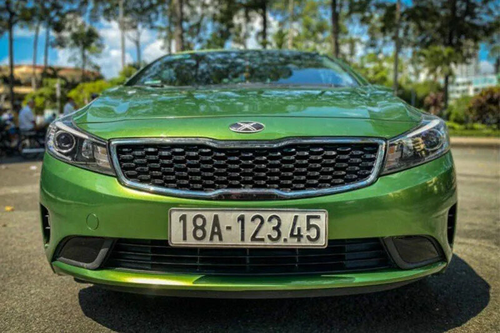

In [12]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.Resampling.LANCZOS)
display(img)

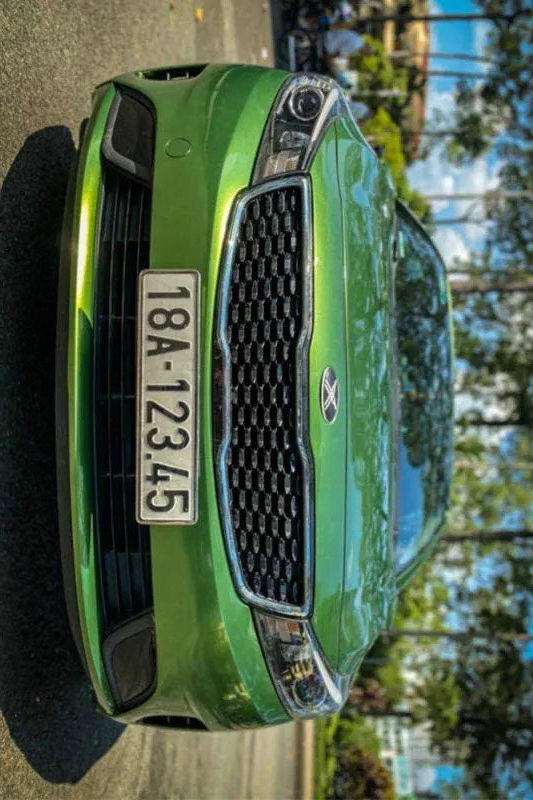

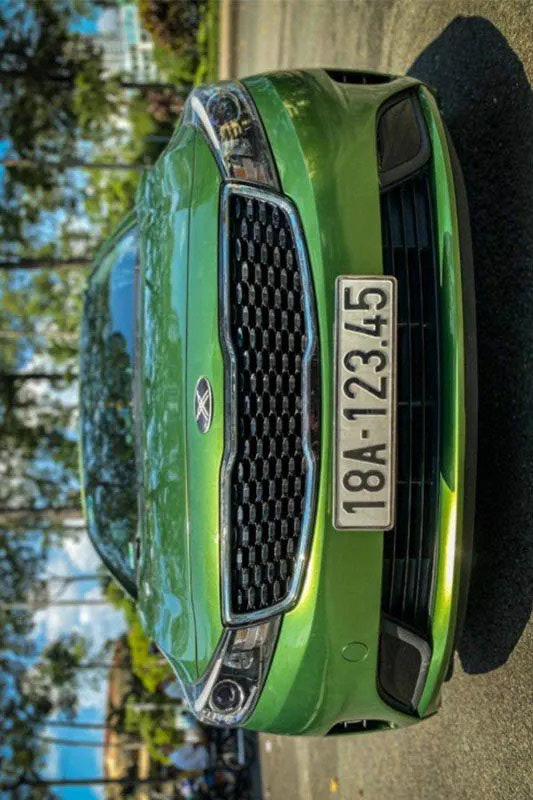

In [5]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

# Đọc ảnh
img = cv2.imread("test_image/web.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển đổi sang RGB để hiển thị đúng màu

# Xoay 90 độ theo chiều kim đồng hồ
rotated_cw = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

# Xoay 90 độ ngược chiều kim đồng hồ
rotated_ccw = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

# # Hiển thị ảnh trong Jupyter Notebook
display(Image.fromarray(rotated_cw))
display(Image.fromarray(rotated_ccw))


YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.6.0 CPU

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.6.0 CPU

Fusing layers... 
Model summary: 290 layers, 20970123 parameters, 0 gradients
Adding AutoShape... 
/Users/kaiser_1/Documents/GitHub/License-Plate-Recognition/yolov5/models/common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/kaiser_1/Documents/GitHub/License-Plate-Recognition/yolov5/models/common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'18A1245'}


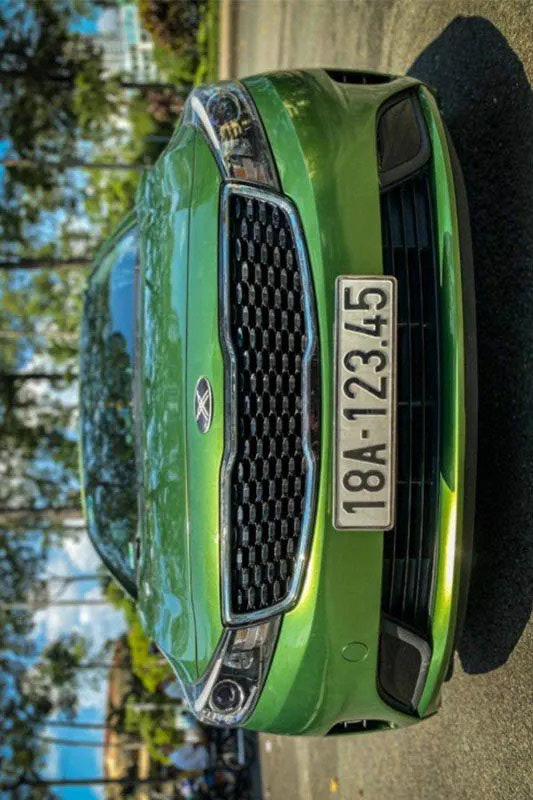

In [8]:
from PIL import Image
import cv2
import torch
import math 
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

# set model confidence threshold 
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60
plates = yolo_LP_detect(rotated_ccw, size=640)
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin  
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    flag = 1
                    break
            if flag == 1:
                break
print(list_read_plates)
# img = Image.open(img_file)
# basewidth = 500
# wpercent = (basewidth/float(img.size[0]))
# hsize = int((float(img.size[1])*float(wpercent)))
# img = img.resize((basewidth,hsize), Image.Resampling.LANCZOS)
# display(img)
display(Image.fromarray(rotated_ccw))

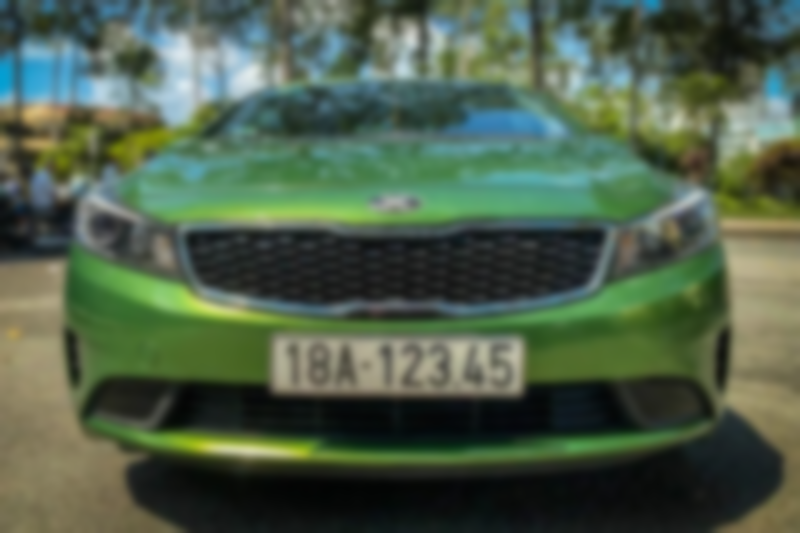

In [12]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

# Đọc ảnh
img = cv2.imread("test_image/web.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB để hiển thị đúng màu

# Làm mờ ảnh với Gaussian Blur
blurred = cv2.GaussianBlur(img, (25, 25), 0)  # Kernel size (15,15) có thể điều chỉnh

# Hiển thị ảnh gốc và ảnh làm mờ
display(Image.fromarray(blurred))


YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.6.0 CPU

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.6.0 CPU

Fusing layers... 
Model summary: 290 layers, 20970123 parameters, 0 gradients
Adding AutoShape... 
/Users/kaiser_1/Documents/GitHub/License-Plate-Recognition/yolov5/models/common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/kaiser_1/Documents/GitHub/License-Plate-Recognition/yolov5/models/common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'18A12345'}


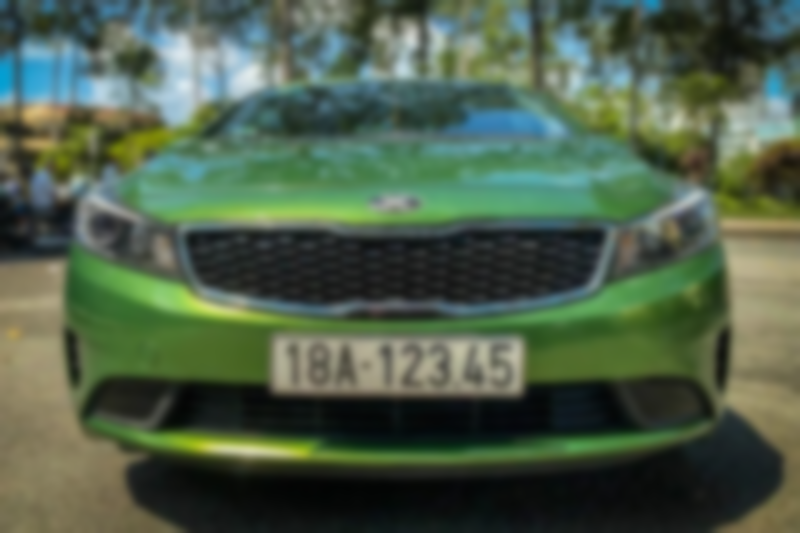

In [14]:
from PIL import Image
import cv2
import torch
import math 
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

# set model confidence threshold 
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60
plates = yolo_LP_detect(blurred, size=640)
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin  
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    flag = 1
                    break
            if flag == 1:
                break
print(list_read_plates)
# img = Image.open(img_file)
# basewidth = 500
# wpercent = (basewidth/float(img.size[0]))
# hsize = int((float(img.size[1])*float(wpercent)))
# img = img.resize((basewidth,hsize), Image.Resampling.LANCZOS)
# display(img)
display(Image.fromarray(blurred))

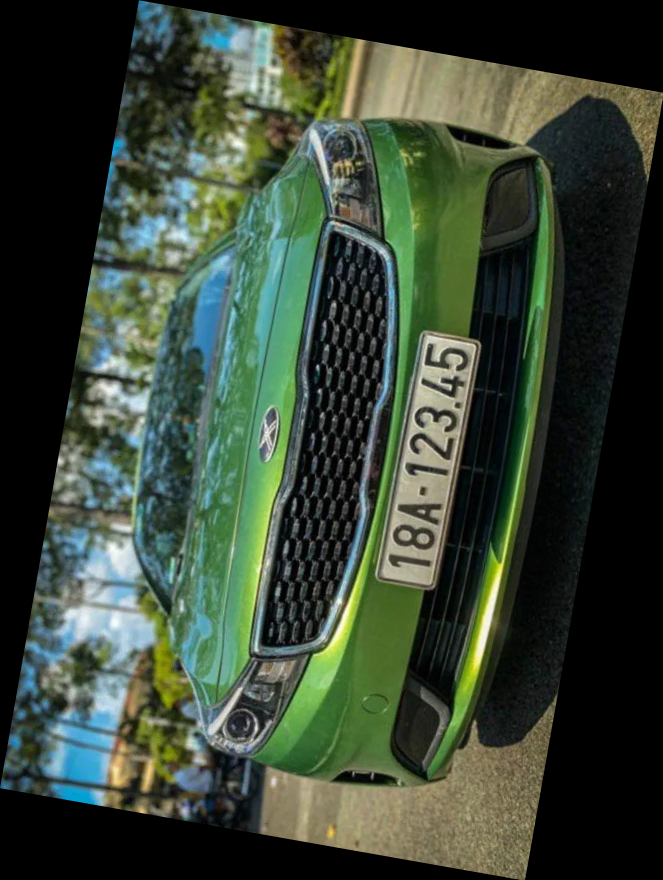

In [22]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

# Đọc ảnh
img = cv2.imread("test_image/web.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển đổi sang RGB để hiển thị đúng màu

# Lấy kích thước ảnh
(h, w) = img.shape[:2]
center = (w // 2, h // 2)  # Tâm ảnh

# Tạo ma trận xoay 30 độ
angle = 80
scale = 1.0  # Giữ nguyên kích thước
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Tính kích thước mới của ảnh sau khi xoay
cos_val = np.abs(rotation_matrix[0, 0])
sin_val = np.abs(rotation_matrix[0, 1])
new_w = int((h * sin_val) + (w * cos_val))
new_h = int((h * cos_val) + (w * sin_val))

# Cập nhật ma trận xoay để giữ toàn bộ ảnh
rotation_matrix[0, 2] += (new_w - w) / 2
rotation_matrix[1, 2] += (new_h - h) / 2

# Xoay ảnh
rotated = cv2.warpAffine(img, rotation_matrix, (new_w, new_h))

# Hiển thị ảnh trong Jupyter Notebook
display(Image.fromarray(rotated))


YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.6.0 CPU

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.6.0 CPU

Fusing layers... 
Model summary: 290 layers, 20970123 parameters, 0 gradients
Adding AutoShape... 
/Users/kaiser_1/Documents/GitHub/License-Plate-Recognition/yolov5/models/common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/kaiser_1/Documents/GitHub/License-Plate-Recognition/yolov5/models/common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'18A1245'}


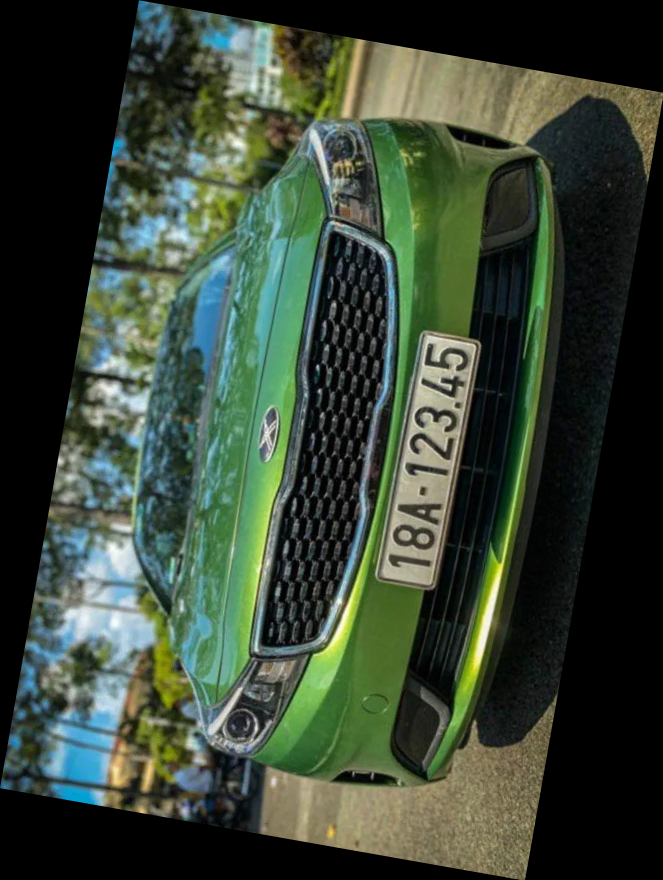

In [23]:
from PIL import Image
import cv2
import torch
import math 
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

# set model confidence threshold 
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60
plates = yolo_LP_detect(rotated, size=640)
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin  
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    flag = 1
                    break
            if flag == 1:
                break
print(list_read_plates)
# img = Image.open(img_file)
# basewidth = 500
# wpercent = (basewidth/float(img.size[0]))
# hsize = int((float(img.size[1])*float(wpercent)))
# img = img.resize((basewidth,hsize), Image.Resampling.LANCZOS)
# display(img)
display(Image.fromarray(rotated))